## Load Data

In [ ]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [ ]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## RMSProp 

In [ ]:
#Better optimizer

initializer = tf.keras.initializers.RandomNormal()

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))


# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)
# 118/118 - 1s - loss: 0.3441 - accuracy: 0.8758 - val_loss: 0.4317 - val_accuracy: 0.8468 - 537ms/epoch - 5ms/step 


Epoch 1/300
118/118 - 9s - loss: 1.7561 - accuracy: 0.2664 - val_loss: 1.3695 - val_accuracy: 0.3638 - 9s/epoch - 72ms/step
Epoch 2/300
118/118 - 1s - loss: 1.2319 - accuracy: 0.4285 - val_loss: 1.1418 - val_accuracy: 0.4753 - 578ms/epoch - 5ms/step
Epoch 3/300
118/118 - 1s - loss: 1.0843 - accuracy: 0.5157 - val_loss: 1.0321 - val_accuracy: 0.5810 - 557ms/epoch - 5ms/step
Epoch 4/300
118/118 - 1s - loss: 0.9670 - accuracy: 0.6158 - val_loss: 0.9341 - val_accuracy: 0.5833 - 571ms/epoch - 5ms/step
Epoch 5/300
118/118 - 1s - loss: 0.8899 - accuracy: 0.6571 - val_loss: 0.8641 - val_accuracy: 0.6696 - 574ms/epoch - 5ms/step
Epoch 6/300
118/118 - 1s - loss: 0.8435 - accuracy: 0.6748 - val_loss: 0.8632 - val_accuracy: 0.6780 - 559ms/epoch - 5ms/step
Epoch 7/300
118/118 - 1s - loss: 0.8193 - accuracy: 0.6845 - val_loss: 0.8100 - val_accuracy: 0.6984 - 562ms/epoch - 5ms/step
Epoch 8/300
118/118 - 1s - loss: 0.7958 - accuracy: 0.6910 - val_loss: 0.8417 - val_accuracy: 0.6687 - 537ms/epoch - 5ms

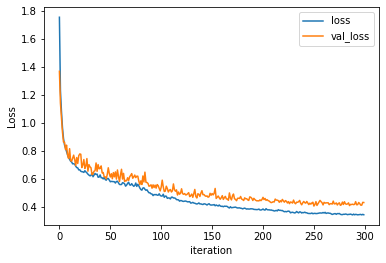

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

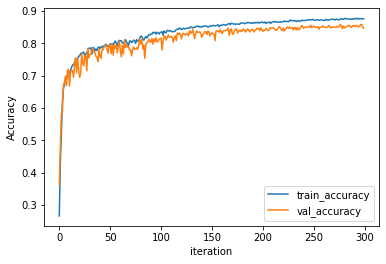

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()